## Trained Models Tests ##

This notebook helps to test different trained models, compare their accuracy and their efficiency.

In [14]:
# Initialization : importing useful libraries
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib

from tensorflow import keras

from sklearn.metrics import plot_confusion_matrix

Creation of the prediction function. The estimator and confusion matrix plotting function was taken from https://www.kaggle.com/code/mdmashurshalehin/plotting-confusion-matrix-for-tensorflow-model.

In [19]:
# Model test function
# This function takes in argument a saved model and a batch of images to be predicted from a directory
class estimator:
    _estimator_type = ''
    classes_=[]
    def __init__(self, model, classes):
        self.model = model
        self._estimator_type = 'classifier'
        self.classes_ = classes
    def predict(self, X):
        y_prob= self.model.predict(X)
        y_pred = y_prob.argmax(axis=1)
        return y_pred

def modeltest(model,datatest):

    predata = datatest.unbatch()
    labels = list(predata.map(lambda x, y: y))
    labels_brut=[]

    for i in range(len(labels)): # gets the list of the predicted label for each image 
        labels_brut.append(tf.get_static_value(labels[i]))

    dict={0:"F",1:"M",2:"N",3:"Q",4:"S",5:"V"}
    prediction = model.predict(datatest) 

    classes = np.argmax(prediction, axis = 1)

    for i,clas in enumerate(classes) :
        print(f"Image {i} || Predicted Disease : "+dict[clas] +" || True Disease : "+dict[labels_brut[i]])  


def confusionmatrix(model,datatest):
    predata = datatest.unbatch()
    labels = list(predata.map(lambda x, y: y))
    labels_brut=[]

    for i in range(len(labels)): # gets the list of the predicted label for each image 
        labels_brut.append(tf.get_static_value(labels[i]))

    prediction = model.predict(datatest) 

    classifier = estimator(model, ["F","M","N","Q","S","V"])
    plot_confusion_matrix(estimator=classifier, X=datatest, y_true=labels_brut)


### Model 1 ###

model_20E_fulldata.h5

Number of Epochs : 20 

Dataset : Full Dataset

Color : COLORFUL 


// Insert here a scheme of the NN (layers), parameters //

#### Testing Model with Colorful Images ####


Found 108 files belonging to 6 classes.
Found 6 files belonging to 6 classes.
1/1 [==============================] - 0s 346ms/step
Image 0 || Predicted Disease : F || True Disease : F
Image 1 || Predicted Disease : M || True Disease : M
Image 2 || Predicted Disease : N || True Disease : N
Image 3 || Predicted Disease : Q || True Disease : Q
Image 4 || Predicted Disease : S || True Disease : S
Image 5 || Predicted Disease : V || True Disease : V
4/4 [==============================] - 1s 204ms/step


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


4/4 [==============================] - 1s 220ms/step


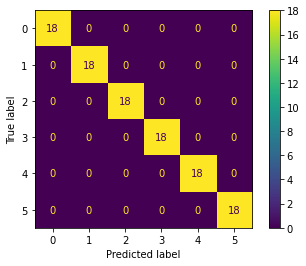

In [23]:
# Model 1 

model1 = tf.keras.models.load_model('model/model_20E_fulldata.h5')

hugedata=tf.keras.utils.image_dataset_from_directory("Small_dataset/S_training_datas_labels",shuffle=False)
predictdata=tf.keras.utils.image_dataset_from_directory("Small_dataset/S_prediction_datas_labels",shuffle=False)

modeltest(model1,predictdata)
confusionmatrix(model1,hugedata)


#### Testing Model with black and white images ####

Found 144 files belonging to 6 classes.
Found 6 files belonging to 6 classes.
1/1 [==============================] - 0s 86ms/step
Image 0 || Predicted Disease : M || True Disease : F
Image 1 || Predicted Disease : M || True Disease : M
Image 2 || Predicted Disease : M || True Disease : N
Image 3 || Predicted Disease : M || True Disease : Q
Image 4 || Predicted Disease : M || True Disease : S
Image 5 || Predicted Disease : M || True Disease : V
5/5 [==============================] - 1s 262ms/step


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


5/5 [==============================] - 1s 235ms/step


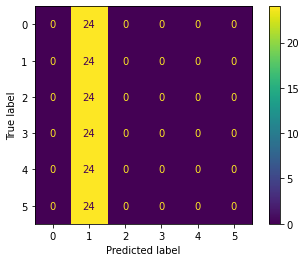

In [25]:
simpledata=tf.keras.utils.image_dataset_from_directory("Small_dataset/S_datas_labels_cb_bw",shuffle=False)
predictdata=tf.keras.utils.image_dataset_from_directory("Small_dataset/S_prediction_datas_labels_bw",shuffle=False)

modeltest(model1,predictdata)
confusionmatrix(model1,simpledata)


### Model 2 ###

model_test_smalldata.h5


Found 144 files belonging to 6 classes.
Found 6 files belonging to 6 classes.
2/2 [==============================] - 0s 37ms/step
Image 0 || Predicted Disease : M || True Disease : F
Image 1 || Predicted Disease : M || True Disease : M
Image 2 || Predicted Disease : M || True Disease : N
Image 3 || Predicted Disease : M || True Disease : Q
Image 4 || Predicted Disease : M || True Disease : S
Image 5 || Predicted Disease : V || True Disease : V
 2/29 [=>............................] - ETA: 1s

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


29/29 [==============================] - 1s 51ms/step


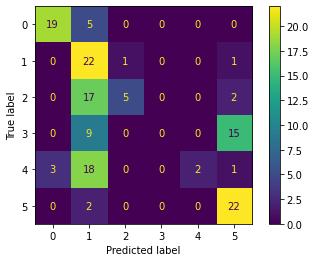

In [26]:
model2 = tf.keras.models.load_model('model/model_test_smalldata.h5')

simpledata=tf.keras.utils.image_dataset_from_directory("Small_dataset/S_datas_labels_cb_bw",shuffle=False,batch_size=5)
predictdata=tf.keras.utils.image_dataset_from_directory("Small_dataset/S_prediction_datas_labels_bw",shuffle=False,batch_size=5)


modeltest(model2,predictdata)
confusionmatrix(model2,simpledata)